In [1]:
pip install pandas-datareader


In [2]:
# Library
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf


C:\Users\prate\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [3]:
start = '2021-01-01'
end = '2021-12-31'

market = 'SPY'
symbol1 = 'AAPL'
symbol2 = 'MSFT'
bench = yf.download(market, start=start, end=end)['Adj Close']
stock1 = yf.download(symbol1, start=start, end=end)['Adj Close']
stock2 = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Stock prices from 2021-01-01 to 2021-12-31')

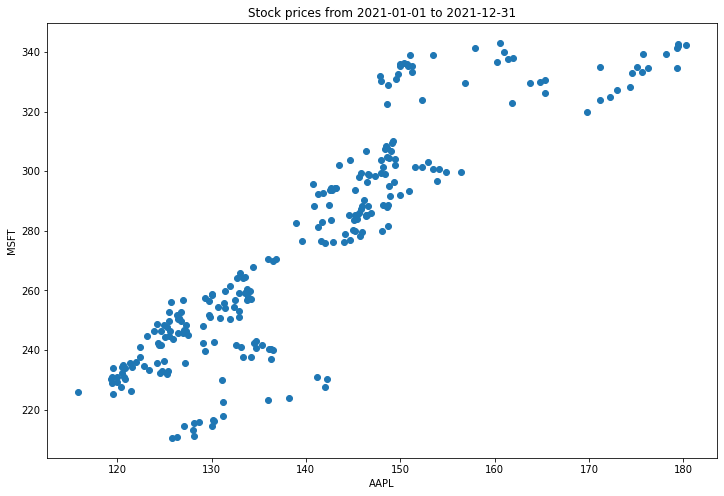

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(stock1,stock2)
plt.xlabel(symbol1)
plt.ylabel(symbol2)
plt.title('Stock prices from ' + start + ' to ' + end)

Text(0.5, 1.0, 'Stock prices from 2021-01-01 to 2021-12-31')

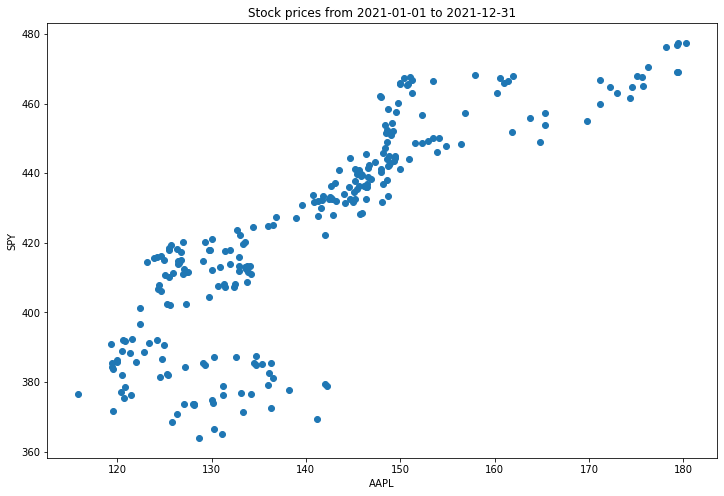

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(stock1,bench)
plt.xlabel(symbol1)
plt.ylabel(market)
plt.title('Stock prices from ' + start + ' to ' + end)

Text(0.5, 1.0, 'Stock prices from 2021-01-01 to 2021-12-31')

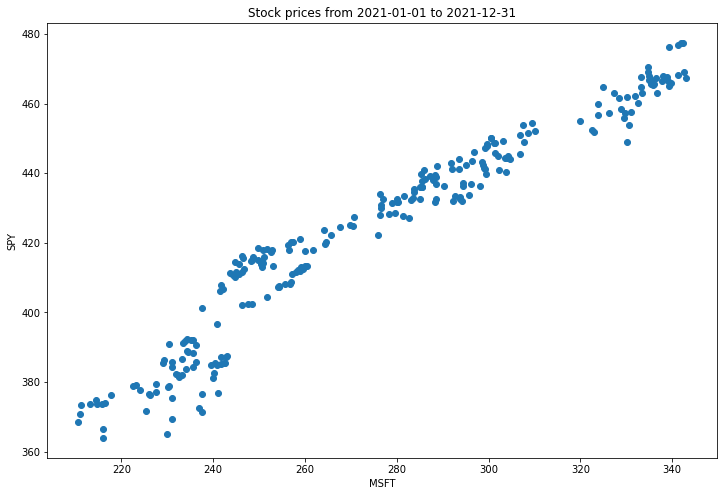

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(stock2,bench)
plt.xlabel(symbol2)
plt.ylabel(market)
plt.title('Stock prices from ' + start + ' to ' + end)

In [7]:
print("Correlation coefficients")
print(symbol1 + ' and ' + symbol2 + ':', np.corrcoef(stock1,stock2)[0,1])
print(symbol1 + ' and ' + market + ':', np.corrcoef(stock1,bench)[0,1])
print(market + ' and ' + symbol2 + ':', np.corrcoef(bench,stock2)[0,1])

Correlation coefficients
AAPL and MSFT: 0.890898283288693
AAPL and SPY: 0.8361004511163074
SPY and MSFT: 0.9669568740443705


Text(0, 0.5, '60-day Rolling Correlation')

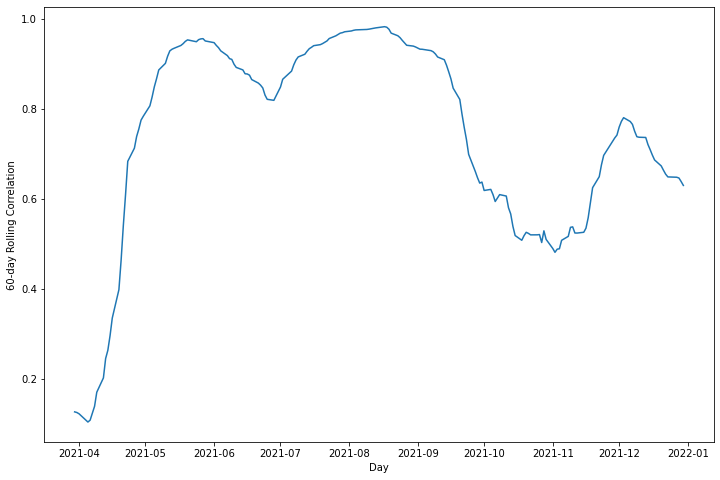

In [8]:
rolling_correlation = stock1.rolling(60).corr(stock2)
plt.figure(figsize=(12,8))
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')